### The Sparks Foundation Feb2023 - Data Science and Business Analytic intern

## Name -  Atharva Agrawal 
## GRIP - The Sparks Foundation
## Role - Data Science & Business Analytics
## February (2023) Batch


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Problem Statement :- 
### Perform ‘Exploratory Data Analysis(Intermediate Level)’ on dataset ‘Terrorism’ As a security/defense analyst,finding the hot zone of terrorism.

## Dataset Link  : 
https://bit.ly/2TK5Xn5

In [2]:
## Importing Required Librarys
import pandas as pd 
import numpy as np 
import math 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Spark foundation dataset/globalterrorismdb_0718dist.csv",encoding="ISO-8859-1")

In [4]:
## df.sample will randomly print mentioned no. of rows 
df.sample(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
168244,201610190011,2016,10,19,2016-10-19 00:00:00,0,NaN,95,Iraq,10,...,NaN,"""Iraq: Security Roundup 1900 GMT 19 October 20...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
40933,198912150007,1989,12,15,NaN,0,NaN,183,South Africa,11,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
86333,200804100008,2008,4,10,NaN,0,NaN,155,West Bank and Gaza Strip,10,...,NaN,"Triton Reports, ""Palestinian Militants Operati...","israelnationalnews.com, ""Samaria: Arabs Throw ...",NaN,ISVG,-9,-9,0,-9,NaN
5622,197712100001,1977,12,10,NaN,0,NaN,185,Spain,8,...,NaN,NaN,NaN,NaN,PGIS,0,1,0,1,NaN
50777,199203270005,1992,3,27,NaN,0,NaN,68,Finland,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN


In [5]:
df.shape
# there are 135 feature columns following 1,81,691 rows 

(181691, 135)

In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
# renaming required columns for better use

df.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day',
                   'country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType',
                   'target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary',
                   'gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type',
                   'motive':'Motive'},inplace=True)


In [8]:
df.columns

Index(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [9]:
# Combining killed and wounded as casualities as both means the same 

df['Casualities'] = df.Killed + df.Wounded 

In [10]:
# Selecting Important column

df=df[['Year','Month','Day','Country','Region','City','latitude','longitude',
       'AttackType','Killed','Wounded','Casualities','Target','Group','Target_type','Weapon_type']]

In [11]:
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'City', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Casualities', 'Target',
       'Group', 'Target_type', 'Weapon_type'],
      dtype='object')

In [12]:
df.sample(5)

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
122668,2013,10,27,Iraq,Middle East & North Africa,Mosul,36.354145,43.143570,Bombing/Explosion,3.0,1.0,4.0,Patrol,Unknown,Military,Explosives
89169,2008,10,24,Afghanistan,South Asia,NaN,31.026149,62.450415,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Abdol Ahad, the deputy of an estate,",Unknown,Private Citizens & Property,Unknown
88321,2008,8,7,India,South Asia,Tamulpur,26.639243,91.574214,Armed Assault,1.0,1.0,2.0,Suresh Brahma and Bisho Goyari,Unknown,Private Citizens & Property,Firearms
23174,1984,9,4,Chile,South America,Santiago,-33.366238,-70.505302,Armed Assault,NaN,NaN,NaN,*,Unknown,Transportation,Incendiary
84350,2007,10,3,Pakistan,South Asia,Mir Ali,32.975433,70.273735,Bombing/Explosion,14.0,5.0,19.0,Unknown,Unknown,Unknown,Explosives


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   City         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Casualities  164817 non-null  float64
 12  Target       181055 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
dtypes: float64(5), int64(3), object(8)
memory usage: 22.2+ MB


In [14]:
df.isnull().sum()
# There are many null values but we re not going to treat it.

Year               0
Month              0
Day                0
Country            0
Region             0
City             434
latitude        4556
longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Casualities    16874
Target           636
Group              0
Target_type        0
Weapon_type        0
dtype: int64

In [15]:
# Unique values 
df.nunique()

Year              47
Month             13
Day               32
Country          205
Region            12
City           36674
latitude       48322
longitude      48039
AttackType         9
Killed           205
Wounded          238
Casualities      341
Target         86006
Group           3537
Target_type       22
Weapon_type       12
dtype: int64

## Visualisation 

### Yearly Plots
### Terrorist Activities Yearly

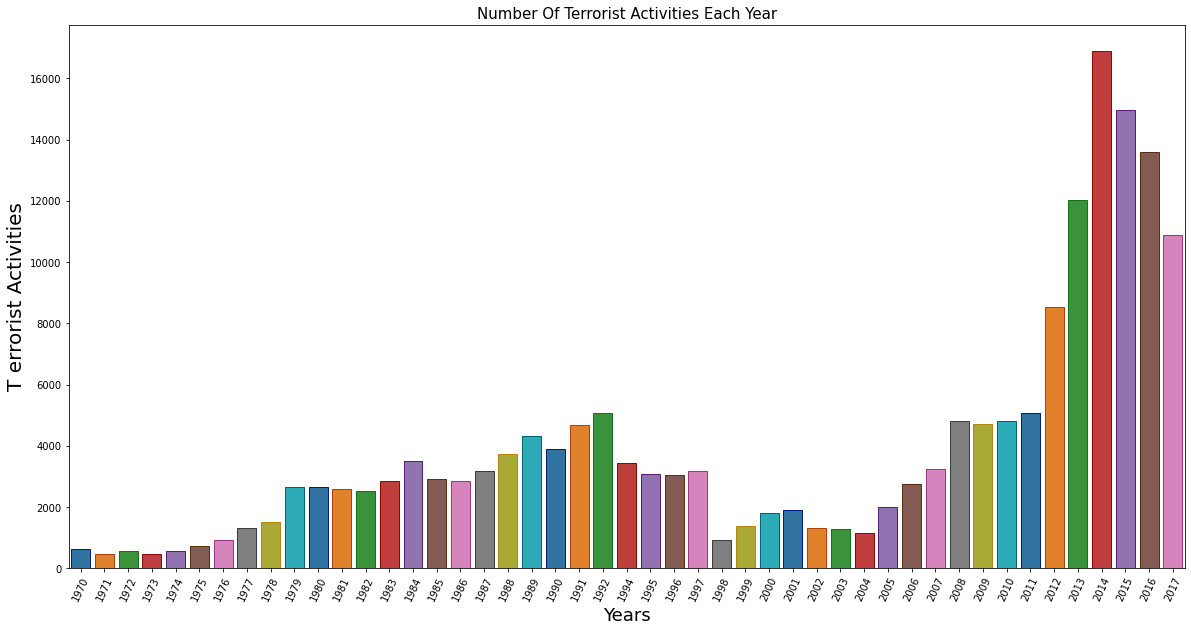

In [16]:
plt.subplots(figsize=(20,10))
sns.countplot('Year',data=df,palette='tab10',edgecolor=sns.color_palette('dark',10))
plt.xlabel('Years',fontsize=18)
plt.ylabel('T errorist Activities',fontsize=20)
plt.xticks(rotation=65)
plt.title('Number Of Terrorist Activities Each Year',fontsize=15)
plt.show()

### Terrorist Activities by Region in each Year (Cross Tab)

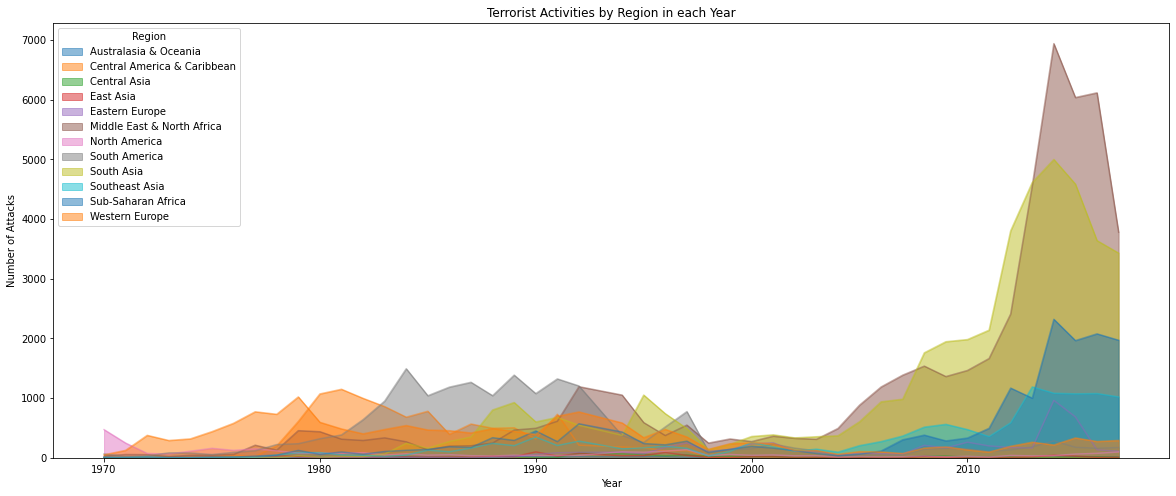

In [17]:
pd.crosstab(df.Year, df.Region).plot(kind='area',stacked=False,figsize=(20,8))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

### Yearly Casualities


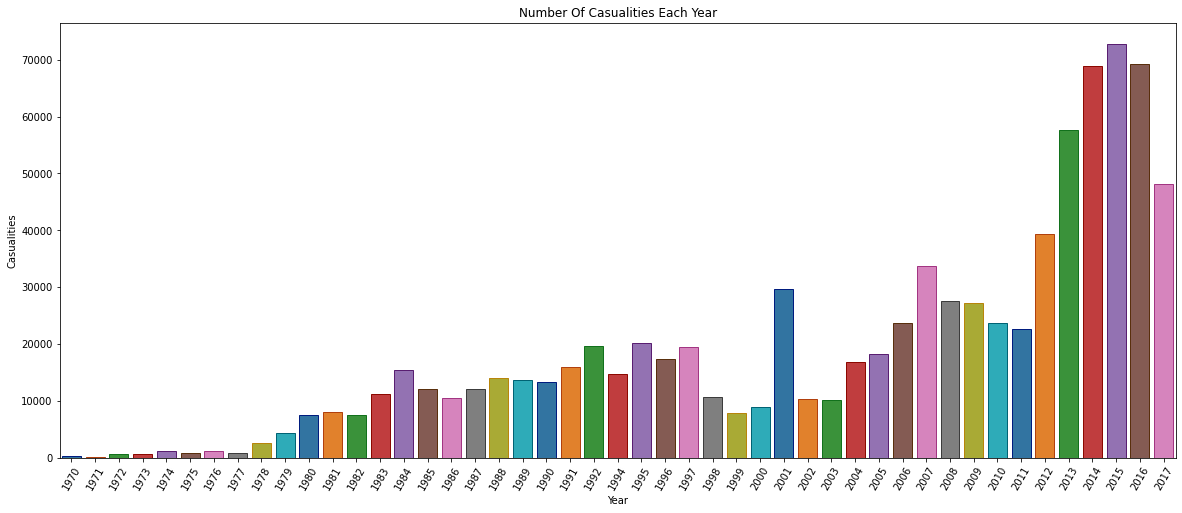

In [18]:
plt.subplots(figsize=(20,8))
year_cas = df.groupby('Year').Casualities.sum().to_frame().reset_index()
year_cas.columns = ['Year','Casualities']
sns.barplot(x=year_cas.Year, y=year_cas.Casualities, palette='tab10',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=60)
plt.title('Number Of Casualities Each Year')
plt.show()

### Number of Total Attacks in Each Region

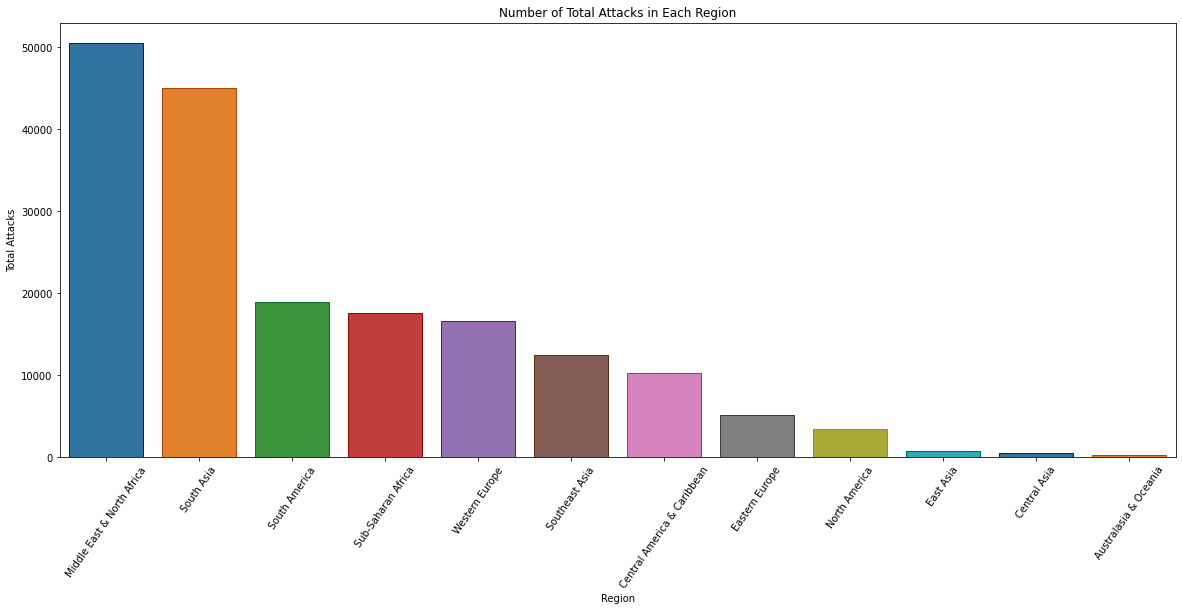

In [19]:
region_attacks = df.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(20,8))
sns.barplot(x=region_attacks.Region, y=region_attacks['Total Attacks'], palette='tab10', edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=55)
plt.title('Number of Total Attacks in Each Region')
plt.show()

### Top Countries affected by the Terrorist Attack







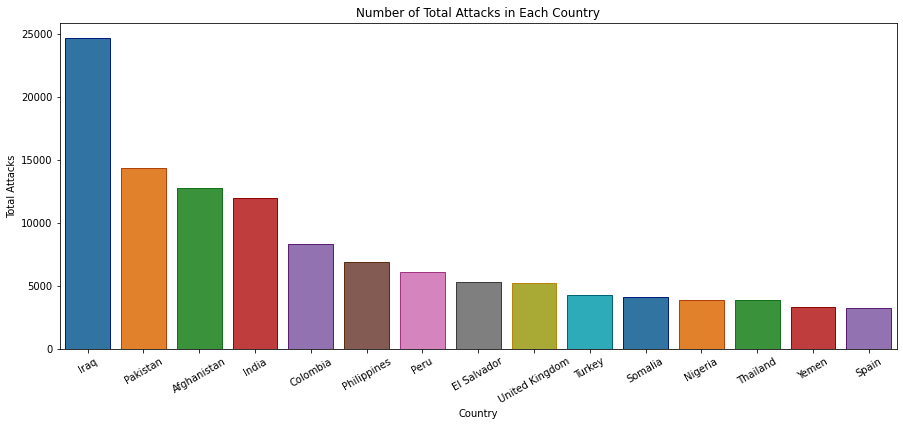

In [20]:
plt.subplots(figsize=(15,6))
country_attacks = df.Country.value_counts()[:15].reset_index()
country_attacks.columns = ['Country', 'Total Attacks']
sns.barplot(x=country_attacks.Country, y=country_attacks['Total Attacks'], palette= 'tab10',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Number of Total Attacks in Each Country')
plt.show()

### Top Citys Affected by the Attacks

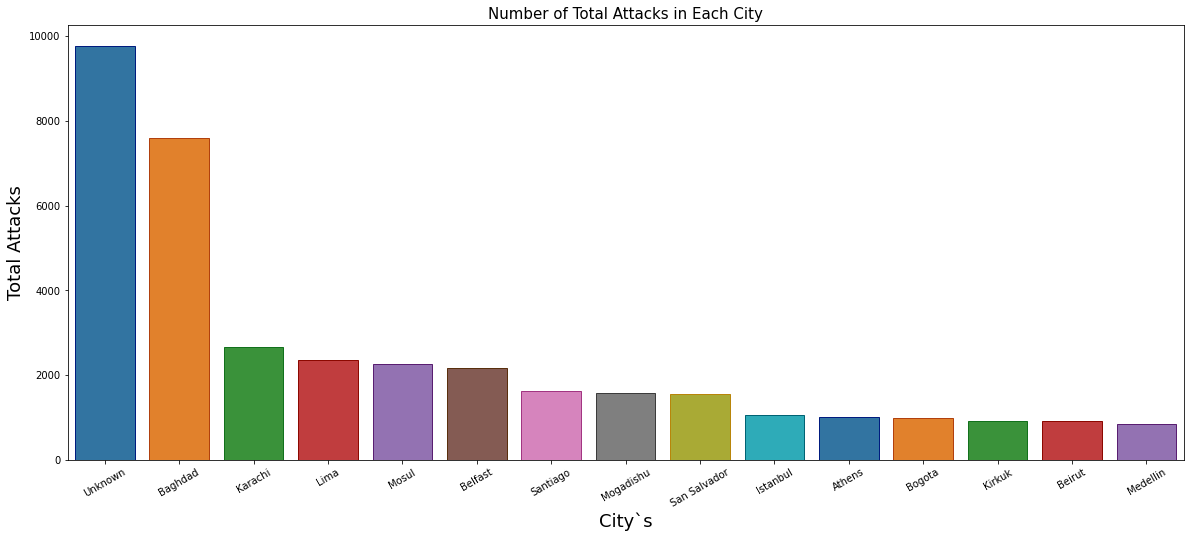

In [21]:
plt.subplots(figsize=(20,8))
city_attacks = df.City.value_counts()[:15].reset_index()
city_attacks.columns = ['Country', 'Total Attacks']
sns.barplot(x=city_attacks.Country, y=city_attacks['Total Attacks'], palette= 'tab10',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Number of Total Attacks in Each City',fontsize=15)
plt.xlabel('City`s',fontsize=18)
plt.ylabel('Total Attacks',fontsize=18)
plt.show()

### Additional Results 

In [22]:
print("Total Countries :-",df.Country.nunique())
print("Total Regions :-",df.Region.nunique())
print("Total Years :-",df.Year.nunique())
print("Year Ranging in the DataSet from ",df.Year.min()," To ",df.Year.max())
print("Terrorist Attack Counting :-",df.index.nunique())
print("Total Casualities :-",df.Casualities.sum())
print("Killed :-",df.Killed.sum())
print("Wounded",df.Wounded.sum())

Total Countries :- 205
Total Regions :- 12
Total Years :- 47
Year Ranging in the DataSet from  1970  To  2017
Terrorist Attack Counting :- 181691
Total Casualities :- 872892.0
Killed :- 411868.0
Wounded 523869.0


In [23]:
print("Country with the most attacks:",df['Country'].value_counts().idxmax())
print("City with the most attacks:",df['City'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",df['Region'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Month with the most attacks:",df['Month'].value_counts().idxmax())
print("Group with the most attacks:",df['Group'].value_counts().index[1])
print("Most Attack Types:",df['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


### Most used Weapon type by Terrorist 

In [24]:
subweapons = df['Weapon_type'].value_counts()
subweapons = pd.DataFrame(subweapons)

subweapons.reset_index(level=0, inplace=True)
subweapons.columns = ['Weapon Sub Type used', 'Weapon Count']
subweapons

,Weapon Sub Type used,Weapon Count
0,Explosives,92426
1,Firearms,58524
2,Unknown,15157
3,Incendiary,11135
4,Melee,3655
5,Chemical,321
6,Sabotage Equipment,141
7,Vehicle (not to include vehicle-borne explosiv...,136
8,Other,114
9,Biological,35


## Tableau Part 

In [25]:
%%HTML
<div class='tableauPlaceholder' id='viz1647360823046' style='position: relative'>
    <noscript>
        <a href='#'>
            <img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;TerrorismDataAnalysis_16364770272310&#47;Dashboard1&#47;1_rss.png' style='border: none' />
        </a>
    </noscript>
    <object class='tableauViz'  style='display:none;'>
        <param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> 
        <param name='embed_code_version' value='3' /> 
        <param name='site_root' value='' />
        <param name='name' value='TerrorismDataAnalysis_16364770272310&#47;Dashboard1' />
        <param name='tabs' value='yes' />
        <param name='toolbar' value='yes' />
        <param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;TerrorismDataAnalysis_16364770272310&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' />
        <param name='display_static_image' value='yes' />
        <param name='display_spinner' value='yes' />
        <param name='display_overlay' value='yes' />
        <param name='display_count' value='yes' />
        <param name='language' value='en-US' />
    </object>
</div>                
<script type='text/javascript'>   
var divElement = document.getElementById('viz1647360823046');                    
    var vizElement = divElement.getElementsByTagName('object')[0];                    
    if ( divElement.offsetWidth > 800 ) { 
        vizElement.style.width='100%';
        vizElement.style.height = (divElement.offsetWidth*0.75)+'px';
    } else if ( divElement.offsetWidth > 400 ) { 
        vizElement.style.width='100%';
        vizElement.style.height=(divElement.offsetWidth*0.75)+'px';
    } else { 
        vizElement.style.width='100%';
        vizElement.style.minHeight='1350px';
        vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';
    }  
    var scriptElement = document.createElement('script');                    
    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
    vizElement.parentNode.insertBefore(scriptElement, vizElement);                
</script>